# PROBLEM STATEMENT-1
1) Prepare a classification model using Naive Bayes 
for salary data 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing CSV File

#### Importing Train Data

In [2]:

salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# EDA

In [3]:
salary_train.shape

(21975, 14)

In [4]:
salary_train.info

<bound method DataFrame.info of        age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
21970   40        Federal-gov        HS-grad            9   
21971   58        Federal-gov   Some-college           10   
21972   20            Private        HS-grad            9   
21973   56            Private      Bachelors           13   
21974   30          Local-gov      Bachelors           13   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2            

In [5]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,21975.000000,21975.000000,21974.000000,21974.000000,21974.000000
mean,38.459750,10.122548,1069.187995,87.336352,40.901657
std,13.182883,2.531777,7315.214583,401.937578,11.951514
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
salary_train.duplicated().sum()

1935

In [7]:
salary_train.value_counts().sum()

21974

In [8]:
salary_train['Salary'].unique()

array([' <=50K', ' >50K', nan], dtype=object)

#### Importing Test Data

In [9]:

salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA

In [10]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
salary_test.duplicated().sum()

930

In [13]:
salary_test.value_counts().sum()

15060

In [14]:
salary_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
salary_test.shape

(15060, 14)

# Feature Engineering

In [16]:
print('Shape of train dataframe before dropping duplicates',salary_train.shape)
print('Shape of test dataframe before dropping duplicates',salary_test.shape)


Shape of train dataframe before dropping duplicates (21975, 14)
Shape of test dataframe before dropping duplicates (15060, 14)


In [17]:
salary_train.drop_duplicates(keep=False,inplace=True)

In [18]:
salary_train.shape

(18787, 14)

In [19]:
salary_test.drop_duplicates(keep=False,inplace=True)

In [20]:
salary_test.shape

(13450, 14)

In [21]:
print('Shape of train dataframe after dropping duplicates',salary_train.shape)
print('Shape of test dataframe after dropping duplicates',salary_test.shape)


Shape of train dataframe after dropping duplicates (18787, 14)
Shape of test dataframe after dropping duplicates (13450, 14)


In [22]:
salary_train.drop('native',axis=1,inplace=True)

In [23]:
salary_test.drop('native',axis=1,inplace=True)

In [24]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,<=50K


In [25]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


# Label Encoding Categorical Columns of train and test dataset

In [26]:


from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  

le=preprocessing.LabelEncoder()
for col in cols:
    
    salary_train[col]=le.fit_transform(salary_train[col])
    salary_test[col]=le.fit_transform(salary_test[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [27]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,2,4,1,2174.0,0.0,40.0,0
1,50,4,9,13,2,3,1,4,1,0.0,0.0,13.0,0
2,38,2,11,9,0,5,2,4,1,0.0,0.0,40.0,0
3,53,2,1,7,2,5,1,2,1,0.0,0.0,40.0,0
4,28,2,9,13,2,9,6,2,0,0.0,0.0,40.0,0


In [28]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


#### Checking output column of train dataset

In [29]:

salary_train['Salary'].value_counts()

0    14003
1     4783
2        1
Name: Salary, dtype: int64

In [30]:
print("Percent of data labelled as 0:",((salary_train['Salary']==0).sum()/len(salary_train)*100))
print("Percent of data labelled as 1:",((salary_train['Salary']==1).sum()/len(salary_train)*100))

Percent of data labelled as 0: 74.53558311598447
Percent of data labelled as 1: 25.459094054399316


## Feature selection on train dataset using ExtraTreesClassifier

In [31]:
x=salary_train.iloc[:,:-1]
y=salary_train.iloc[:,-1]

In [32]:
x = x.fillna(0)

In [33]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,39,5,9,13,4,0,2,4,1,2174.0,0.0,40.0
1,50,4,9,13,2,3,1,4,1,0.0,0.0,13.0
2,38,2,11,9,0,5,2,4,1,0.0,0.0,40.0
3,53,2,1,7,2,5,1,2,1,0.0,0.0,40.0
4,28,2,9,13,2,9,6,2,0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21970,40,0,11,9,2,3,1,4,1,0.0,0.0,40.0
21971,58,0,15,10,2,3,1,4,1,15024.0,0.0,40.0
21972,20,2,11,9,4,0,4,4,0,0.0,0.0,20.0
21973,56,2,9,13,2,0,1,4,1,0.0,0.0,50.0


In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
21970    1
21971    1
21972    0
21973    0
21974    2
Name: Salary, Length: 18787, dtype: int32

### checking target type

In [35]:

from sklearn.utils.multiclass import type_of_target
type_of_target(y)


'multiclass'

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)


[0.23258097 0.05417846 0.03637541 0.08605605 0.09858024 0.09213137
 0.07136827 0.02025652 0.02864911 0.11142416 0.03603306 0.13236637]


In [37]:
model

ExtraTreesClassifier(n_estimators=10)

In [38]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [39]:
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.232581
hoursperweek     0.132366
capitalgain      0.111424
maritalstatus    0.098580
occupation       0.092131
educationno      0.086056
relationship     0.071368
workclass        0.054178
education        0.036375
capitalloss      0.036033
sex              0.028649
race             0.020257
dtype: float64

# Visualization

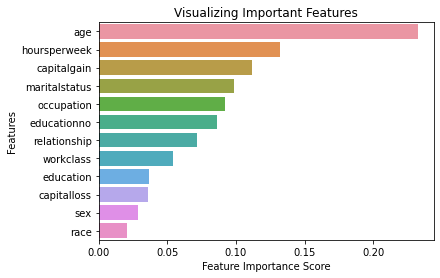

In [40]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


##### Dropping the fivecolumns having least feature importance 

In [41]:

salary_train.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

##### dropping the same columns from test dataset 

In [42]:

salary_test.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [43]:
salary_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,2,2174.0,40.0,0
1,50,13,2,3,1,0.0,13.0,0
2,38,9,0,5,2,0.0,40.0,0
3,53,7,2,5,1,0.0,40.0,0
4,28,13,2,9,6,0.0,40.0,0


In [44]:
salary_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0


In [45]:
salary_train[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,18787.000000,18786.000000,18786.000000
mean,39.312397,1235.947780,41.193921
std,13.257142,7828.807769,12.472758
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [46]:
salary_test[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [47]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fitting on train data
scaler.fit(salary_train[['age','capitalgain','hoursperweek']])

# Transforming train data
salary_train[['age','capitalgain','hoursperweek']]= scaler.transform(salary_train[['age','capitalgain','hoursperweek']])

# Transforming test data
salary_test[['age','capitalgain','hoursperweek']]= scaler.transform(salary_test[['age','capitalgain','hoursperweek']])

In [48]:
## Checking train dataset after standardization

salary_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.023565,13,4,0,2,0.119824,-0.095725,0
1,0.806198,13,2,3,1,-0.157876,-2.260500,0
2,-0.098998,9,0,5,2,-0.157876,-0.095725,0
3,1.032498,7,2,5,1,-0.157876,-0.095725,0
4,-0.853329,13,2,9,6,-0.157876,-0.095725,0


In [49]:
## Checking test dataset after standardization

salary_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.079628,7,4,6,3,-0.157876,-0.095725,0
1,-0.098998,9,2,4,0,-0.157876,0.706044,0
2,-0.853329,12,2,10,0,-0.157876,-0.095725,1
3,0.353600,10,2,6,0,0.824164,-0.095725,1
4,-0.400730,6,4,7,1,-0.157876,-0.897493,0


In [50]:
## Checking output variable of train data
salary_train['Salary'].value_counts()

0    14003
1     4783
2        1
Name: Salary, dtype: int64

## Creating Naive Bayes' model

In [51]:
# Splitting train data

X_train=salary_train.iloc[:,:-1]
Y_train=salary_train.iloc[:,-1]

In [54]:
X_train = X_train.fillna(0)

In [52]:
# Splitting test data

X_test=salary_test.iloc[:,:-1]
Y_test=salary_test.iloc[:,-1]

In [55]:
X_test = X_test.fillna(0)

In [57]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [58]:
y_pred =  nb.predict(X_test)

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, y_pred)
conf_matrix1

array([[9828,  265],
       [2518,  839]], dtype=int64)

Text(20.722222222222214, 0.5, 'True Class')

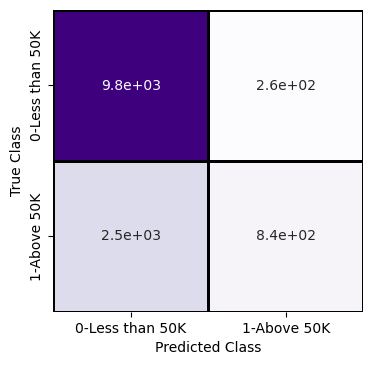

In [61]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


In [62]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.80      0.97      0.88     10093
    1-Above 50K       0.76      0.25      0.38      3357

       accuracy                           0.79     13450
      macro avg       0.78      0.61      0.63     13450
   weighted avg       0.79      0.79      0.75     13450



+ The model has a good precision and high recall for label 0.
+ The model has good precision but very low recall for label 1. A recall of 0.23% means the model was able to identify only 23% of all the 1-labelled data present in test dataset.
+ So the model performs quite well for classifying label 0 data with high recall and moderate precision.

# plot histogram of predicted probabilities

Text(0, 0.5, 'Frequency')

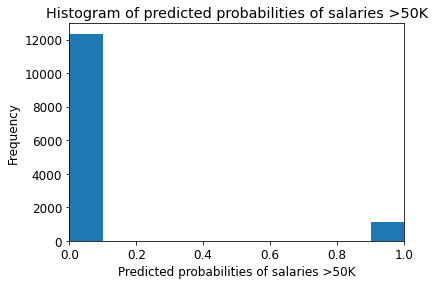

In [78]:



# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')